In [40]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
%run scripts/feature_selection_analyses.py
%run scripts/model_prediction_analyses.py

In [4]:
#Load the metadata for the reference `V7 combined` composite dataset 
# (GSE42861, GSE125105, GSE72774, GSE106648) and separate it by healthy and disease cohorts

v7_meta = pd.read_excel('../dnam-clocks/mFSS-clock/data/processed/metadata/V7_pmeta.xlsx')
h_meta = v7_meta.copy()
d_meta = v7_meta.copy()
h_meta = h_meta[h_meta.disease==0]
d_meta = d_meta[d_meta.disease==1]
h_meta.reset_index(drop=True, inplace=True)
d_meta.reset_index(drop=True, inplace=True)

# For each model, generate the age correlation, residual correlation and p- and log-p-values between the healthy and disease cohorts for each CpG in the model

### AdaptAge

In [5]:
# Read in and prepare the AdaptAge model 
adapt = pd.read_csv('../dnam-clocks/mFSS-clock/data/processed/models/AdaptAge/AdaptAge.csv')
adapt=prep_model(adapt)

#Un-comment to view Dataframe
# adapt

In [6]:
# Load the beta-values for the healthy and disease cohorts from the `V7 combined` composite dataset 
# (GSE42861, GSE125105, GSE72774, GSE106648) for just the AdaptAge CpG selection. For assembling these datasets, 
# view the `Dataset assembly` notebook

h_adapt = pd.read_pickle('../dnam-clocks/mFSS-clock/data/processed/models/AdaptAge/Healthy.pkl')
d_adapt = pd.read_pickle('../dnam-clocks/mFSS-clock/data/processed/models/AdaptAge/Disease.pkl')

In [7]:
# Calculate the age correlations for each CpG in the Adaptage model using the healthy cohort from the composite dataset
adapt_corrs, missing = model_corrs(adapt.loc[1:], h_adapt, h_meta)
adapt_corrs['importance'] = normalized_importance(adapt_corrs)

# Calculate the correlations between age and residuals of the age-correlation for each CpG
adapt_corrs['het_rs'] = het_r(h_adapt, adapt, h_meta.age)

In [8]:
# Perform the Mann-Whitney U test on the beta values of the `V7 combined` composite dataset's healthy and disease cohorts
# groups for the AdaptAge model's selected CpGs. 

adapt_u, adapt_p, adapt_logp = u_test(adapt, h_adapt, d_adapt)
adapt_corrs['u-stat']= adapt_u
adapt_corrs['mann-p']= adapt_p
adapt_corrs['log_p'] = adapt_logp

#Un-comment to view
# adapt_corrs

### DamAge

In [9]:
#Read in and prepare the DamAge model 
dam = pd.read_csv('../dnam-clocks/mFSS-clock/data/processed/models/damAge/damAge.csv')
dam = prep_model(dam)

#Load the beta-values for the healthy and disease cohorts from the `V7 combined` composite dataset 
#(GSE42861, GSE125105, GSE72774, GSE106648) for just the DamAge CpG selection

h_dam = pd.read_pickle('../dnam-clocks/mFSS-clock/data/processed/models/DamAge/Healthy.pkl')
d_dam = pd.read_pickle('../dnam-clocks/mFSS-clock/data/processed/models/DamAge/Disease.pkl')

# Calculate the age correlations for each CpG in the Damage model using the healthy cohort from the composite dataset
dam_corrs, missing = model_corrs(dam.loc[1:], h_dam, h_meta)
dam_corrs['importance'] = normalized_importance(dam_corrs)

# Calculate the correlations between age and residuals of the age-correlation for each CpG
dam_corrs['het_rs'] = het_r(h_dam, dam, h_meta.age)

# Perform the Mann-Whitney U test on the beta values of the `V7 combined` composite dataset's healthy and disease cohorts
# groups for the DamAge model's selected CpGs. 
dam_u, dam_p, dam_logp = u_test(dam, h_dam, d_dam)
dam_corrs['u-stat']= dam_u
dam_corrs['mann-p']= dam_p
dam_corrs['log_p'] = dam_logp

### CausAge

In [10]:
#Read in and prepare the CausAge model 
caus = pd.read_csv('../dnam-clocks/mFSS-clock/data/processed/models/CausAge/CausAge.csv')
caus = prep_model(caus)

#Load the beta-values for the healthy and disease cohorts from the `V7 combined` composite dataset 
#(GSE42861, GSE125105, GSE72774, GSE106648) for just the CausAge CpG selection

h_caus = pd.read_pickle('../dnam-clocks/mFSS-clock/data/processed/models/CausAge/Healthy.pkl')
d_caus = pd.read_pickle('../dnam-clocks/mFSS-clock/data/processed/models/CausAge/Disease.pkl')

# Calculate the age correlations for each CpG in the causage model using the healthy cohort from the composite dataset
caus_corrs, missing = model_corrs(caus.loc[1:], h_caus, h_meta)
caus_corrs['importance'] = normalized_importance(caus_corrs)

# Calculate the correlations between age and residuals of the age-correlation for each CpG
caus_corrs['het_rs'] = het_r(h_caus, caus, h_meta.age)

# Perform the Mann-Whitney U test on the beta values of the `V7 combined` composite dataset's healthy and disease cohorts
# groups for the CausAge model's selected CpGs. 
caus_u, caus_p, caus_logp = u_test(caus, h_caus, d_caus)
caus_corrs['u-stat'] = caus_u
caus_corrs['mann-p'] = caus_p
caus_corrs['log_p'] = caus_logp

### Hannum

In [11]:
#Read in and prepare the Hannum model 
hannum = pd.read_excel('../dnam-clocks/mFSS-clock/data/processed/models/Hannum/Hannum model.xlsx')
hannum = prep_model(hannum)

#Load the beta-values for the healthy and disease cohorts from the `V7 combined` composite dataset 
#(GSE42861, GSE125105, GSE72774, GSE106648) for just the Hannum CpG selection

h_hannum = pd.read_pickle('../dnam-clocks/mFSS-clock/data/processed/models/Hannum/Healthy.pkl')
d_hannum = pd.read_pickle('../dnam-clocks/mFSS-clock/data/processed/models/Hannum/Disease.pkl')

# Calculate the age correlations for each CpG in the Hannum model using the healthy cohort from the composite dataset
hannum_corrs, missing = model_corrs(hannum.loc[1:], h_hannum, h_meta)
hannum_corrs['importance'] = normalized_importance(hannum_corrs)

# # Calculate the correlations between age and residuals of the age-correlation for each CpG
hannum_corrs['het_rs'] = het_r(h_hannum, hannum, h_meta.age)

# # Perform the Mann-Whitney U test on the beta values of the `V7 combined` composite dataset's healthy and disease cohorts
# # groups for the Hannum model's selected CpGs. 
hannum_u, hannum_p, hannum_logp = u_test(hannum, h_hannum, d_hannum)
hannum_corrs['u-stat']= hannum_u
hannum_corrs['mann-p']= hannum_p
hannum_corrs['log_p'] = hannum_logp

### Horvath

In [12]:
#Read in and prepare the horvath model 
horvath = pd.read_excel('../dnam-clocks/mFSS-clock/data/processed/models/Horvath/Horvath model.xlsx')
horvath = prep_model(horvath)

#Load the beta-values for the healthy and disease cohorts from the `V7 combined` composite dataset 
#(GSE42861, GSE125105, GSE72774, GSE106648) for just the Horvath CpG selection

h_horvath = pd.read_pickle('../dnam-clocks/mFSS-clock/data/processed/models/Horvath/Healthy.pkl')
d_horvath = pd.read_pickle('../dnam-clocks/mFSS-clock/data/processed/models/Horvath/Disease.pkl')

# Calculate the age correlations for each CpG in the horvath model using the healthy cohort from the composite dataset
horvath_corrs, missing = model_corrs(horvath.loc[1:], h_horvath, h_meta)
horvath_corrs['importance'] = normalized_importance(horvath_corrs)

# Calculate the correlations between age and residuals of the age-correlation for each CpG
horvath_corrs['het_rs'] = het_r(h_horvath, horvath, h_meta.age)

# Perform the Mann-Whitney U test on the beta values of the `V7 combined` composite dataset's healthy and disease cohorts
# groups for the Horvath model's selected CpGs. 
horvath_u, horvath_p, horvath_logp = u_test(horvath, h_horvath, d_horvath)
horvath_corrs['u-stat']= horvath_u
horvath_corrs['mann-p']= horvath_p
horvath_corrs['log_p'] = horvath_logp

### PhenoAge

In [13]:
#Read in and prepare the phenoage model 
pheno = pd.read_excel('../dnam-clocks/mFSS-clock/data/processed/models/Phenoage/Phenoage model.xlsx')
pheno = prep_model(pheno)

#Load the beta-values for the healthy and disease cohorts from the `V7 combined` composite dataset 
#(GSE42861, GSE125105, GSE72774, GSE106648) for just the Phenoage CpG selection

h_pheno = pd.read_pickle('../dnam-clocks/mFSS-clock/data/processed/models/Phenoage/Healthy.pkl')
d_pheno = pd.read_pickle('../dnam-clocks/mFSS-clock/data/processed/models/Phenoage/Disease.pkl')

# Calculate the age correlations for each CpG in the phenoage model using the healthy cohort from the composite dataset
pheno_corrs, missing = model_corrs(pheno.loc[1:], h_pheno, h_meta)
pheno_corrs['importance'] = normalized_importance(pheno_corrs)

# Calculate the correlations between age and residuals of the age-correlation for each CpG
pheno_corrs['het_rs'] = het_r(h_pheno, pheno, h_meta.age)

# Perform the Mann-Whitney U test on the beta values of the `V7 combined` composite dataset's healthy and disease cohorts
# groups for the PhenoAge model's selected CpGs. 
pheno_u, pheno_p, pheno_logp = u_test(pheno, h_pheno, d_pheno)
pheno_corrs['u-stat']= pheno_u
pheno_corrs['mann-p']= pheno_p
pheno_corrs['log_p'] = pheno_logp

### PACE

In [14]:
#Read in and prepare the PACE model 
pace = pd.read_excel('../dnam-clocks/mFSS-clock/data/processed/models/PACE/PACE.xlsx')
pace = prep_model(pace)

#Load the beta-values for the healthy and disease cohorts from the `V7 combined` composite dataset 
#(GSE42861, GSE125105, GSE72774, GSE106648) for just the PACE CpG selection

h_pace = pd.read_pickle('../dnam-clocks/mFSS-clock/data/processed/models/PACE/Healthy.pkl')
d_pace = pd.read_pickle('../dnam-clocks/mFSS-clock/data/processed/models/PACE/Disease.pkl')

# Calculate the age correlations for each CpG in the PACE model using the healthy cohort from the composite dataset
pace_corrs, missing = model_corrs(pace.loc[1:], h_pace, h_meta)
pace_corrs['importance'] = normalized_importance(pace_corrs)

# Calculate the correlations between age and residuals of the age-correlation for each CpG
pace_corrs['het_rs'] = het_r(h_pace, pace, h_meta.age)

# Perform the Mann-Whitney U test on the beta values of the `V7 combined` composite dataset's healthy and disease cohorts
# groups for the PACE model's selected CpGs. 
pace_u, pace_p, pace_logp = u_test(pace, h_pace, d_pace)
pace_corrs['u-stat']= pace_u
pace_corrs['mann-p']= pace_p
pace_corrs['log_p'] = pace_logp

# Combine all of the model statistics into single dataframe

In [15]:
# Add a model ID column to dataframe

horvath_corrs['model'] = 'Horvath'
hannum_corrs['model'] = 'Hannum'
pheno_corrs['model'] = 'PhenoAge'
pace_corrs['model'] = 'PACE'
adapt_corrs['model'] = 'AdaptAge'
dam_corrs['model'] = 'DamAge'
caus_corrs['model'] = 'CausAge'

# Combine into single dataframe
comb_corrs = pd.concat([horvath_corrs,hannum_corrs,pheno_corrs,pace_corrs,adapt_corrs,dam_corrs, caus_corrs], axis=0)

In [16]:
# Create custom color palette for plots

c_palette = sns.color_palette()
custom = c_palette[:5] + [c_palette[6]]+ c_palette[9:]

# Generate Figure 1a

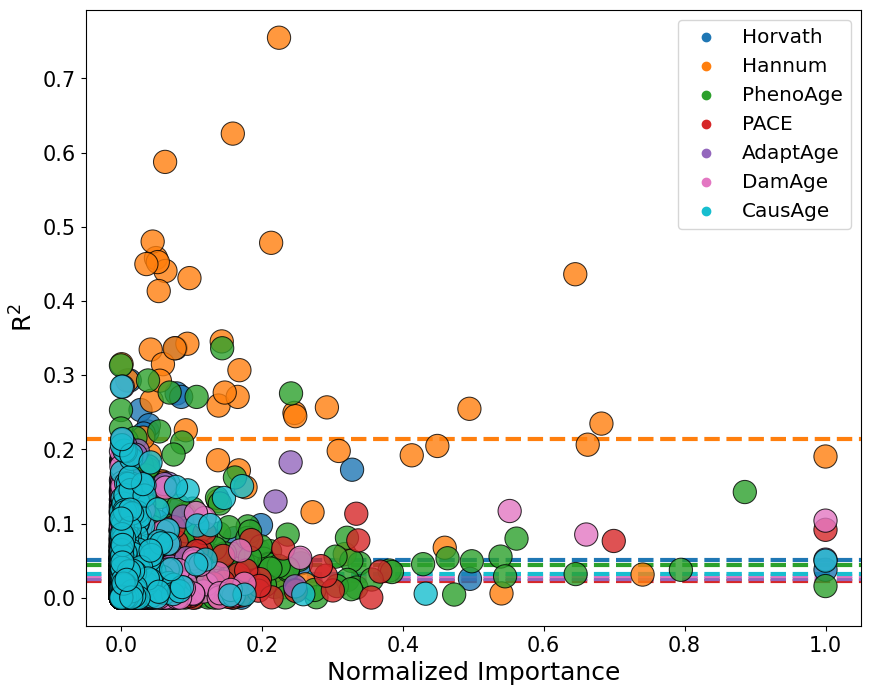

In [17]:
plt.figure(figsize=(10, 8)) 

sns.scatterplot(data=comb_corrs,x='importance', y='R2', hue='model', palette = custom
                ,s=280, alpha=0.8, edgecolor="k", linewidth=0.75 ,zorder=10)

plt.axhline(y=horvath_corrs['R2'].mean(),color=custom[0], linestyle='--',linewidth=3, zorder=1)
plt.axhline(y=hannum_corrs['R2'].mean(),color=custom[1], linestyle='--',linewidth=3, zorder=1)
plt.axhline(y=pheno_corrs['R2'].mean(),color=custom[2], linestyle='--',linewidth=3, zorder=1)
plt.axhline(y=pace_corrs['R2'].mean(),color=custom[3], linestyle='--',linewidth=3)
plt.axhline(y=adapt_corrs['R2'].mean(),color=custom[4], linestyle='--',linewidth=3)
plt.axhline(y=dam_corrs['R2'].mean(),color=custom[5], linestyle='--',linewidth=3)
plt.axhline(y=caus_corrs['R2'].mean(),color=custom[6], linestyle='--',linewidth=3)

plt.xlabel('Normalized Importance',fontsize=18)
plt.ylabel('R$^2$',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize='x-large', title_fontsize='50');

# Generate Figure 1b

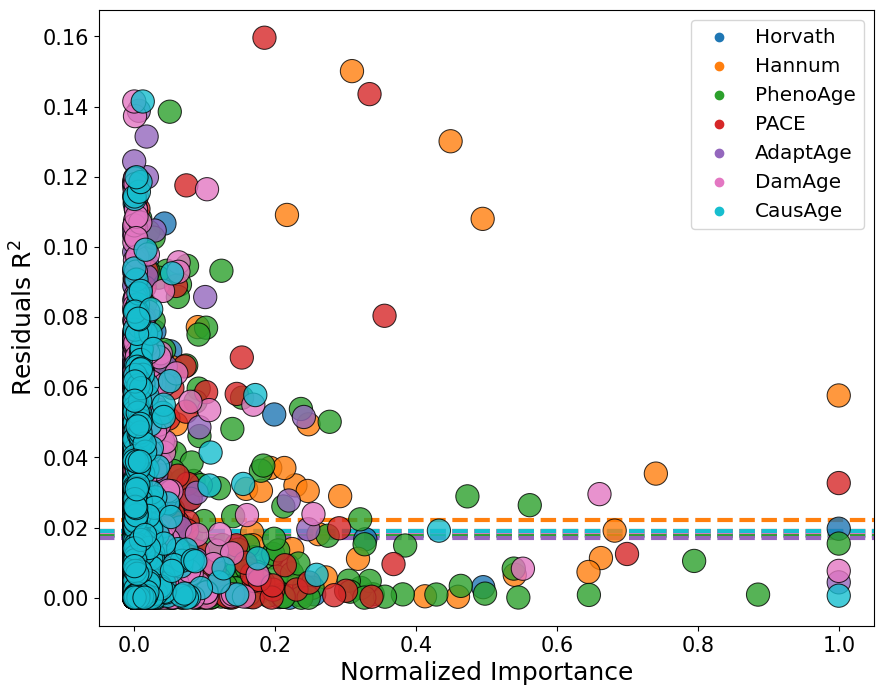

In [18]:
plt.figure(figsize=(10, 8)) 

sns.scatterplot(data=comb_corrs,x='importance', y='het_rs', hue='model', palette = custom
                ,s=280, alpha=0.8, edgecolor="k", linewidth=0.75,zorder=10)

plt.axhline(y=horvath_corrs['het_rs'].mean(),color=custom[0], linestyle='--',linewidth=3, zorder=1)
plt.axhline(y=hannum_corrs['het_rs'].mean(),color=custom[1], linestyle='--',linewidth=3, zorder=1)
plt.axhline(y=pheno_corrs['het_rs'].mean(),color=custom[2], linestyle='--',linewidth=3, zorder=1)
plt.axhline(y=pace_corrs['het_rs'].mean(),color=custom[3], linestyle='--',linewidth=3)
plt.axhline(y=adapt_corrs['het_rs'].mean(),color=custom[4], linestyle='--',linewidth=3)
plt.axhline(y=dam_corrs['het_rs'].mean(),color=custom[5], linestyle='--',linewidth=3)
plt.axhline(y=caus_corrs['het_rs'].mean(),color=custom[6], linestyle='--',linewidth=3)

plt.xlabel('Normalized Importance',fontsize=18)
plt.ylabel('Residuals R$^2$',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize='x-large', title_fontsize='50');

# Generate Figure 1c

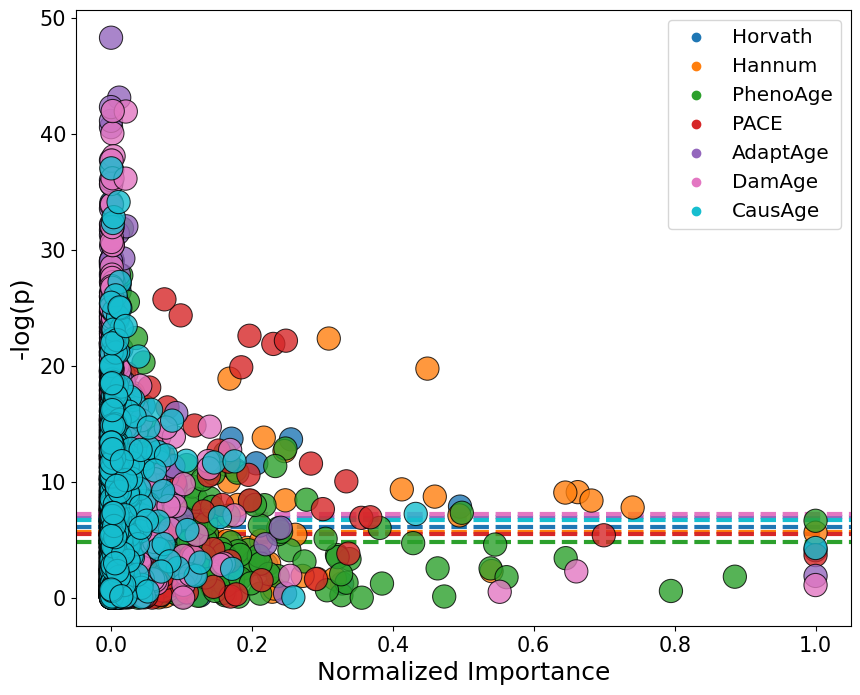

In [19]:
plt.figure(figsize=(10, 8)) 

sns.scatterplot(data=comb_corrs,x='importance', y='log_p', hue='model', palette = custom
                ,s=280, alpha=0.8, edgecolor="k", linewidth=0.75,zorder=10)

plt.axhline(y=horvath_corrs['log_p'].mean(),color=custom[0], linestyle='--',linewidth=3, zorder=1)
plt.axhline(y=hannum_corrs['log_p'].mean(),color=custom[1], linestyle='--',linewidth=3, zorder=1)
plt.axhline(y=pheno_corrs['log_p'].mean(),color=custom[2], linestyle='--',linewidth=3, zorder=1)
plt.axhline(y=pace_corrs['log_p'].mean(),color=custom[3], linestyle='--',linewidth=3)
plt.axhline(y=adapt_corrs['log_p'].mean(),color=custom[4], linestyle='--',linewidth=3)
plt.axhline(y=dam_corrs['log_p'].mean(),color=custom[5], linestyle='--',linewidth=3)
plt.axhline(y=caus_corrs['log_p'].mean(),color=custom[6], linestyle='--',linewidth=3)

plt.xlabel('Normalized Importance',fontsize=18)
plt.ylabel('-log(p)',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize='x-large', title_fontsize='50');

## Load the metadata for the reference `V7 combined` dataset (GSE42861, GSE125105, GSE72774, GSE106648) and separate it by healthy and disease cohorts

In [20]:
v7_meta = pd.read_excel('../dnam-clocks/mFSS-clock/data/processed/metadata/V7_pmeta.xlsx')
h_meta = v7_meta.copy()
d_meta = v7_meta.copy()
h_meta = h_meta[h_meta.disease==0]
d_meta = d_meta[d_meta.disease==1]
h_meta.reset_index(drop=True, inplace=True)
d_meta.reset_index(drop=True, inplace=True)

## Load the AdaptAge model and the beta values of the healthy cohort of the V7 combined dataset filtered on the AdaptAge model's CpG selection

In [21]:
# Load the model
adapt = pd.read_csv('../dnam-clocks/mFSS-clock/data/processed/models/AdaptAge/AdaptAge.csv')

# Read in the healthy cohort of the V7 combined dataset filtered on the AdaptAge model's CpG selection
h_adapt = pd.read_pickle('../dnam-clocks/mFSS-clock/data/processed/models/AdaptAge/Healthy.pkl')

## Get the AdaptAge prediction residuals for the V7 healthy cohort, compute the summary statistics for the residuals and fit a normal distribution to the residuals. All of this data will later be used to generate Figure 2, Supplementary Figure 2 and Table 1

In [22]:
# Prep the AdaptAge model, giving it the right column names and CpG order matching that of the dataset
adapt=prep_model(adapt)

help(prep_model)

Help on function prep_model in module utils.data_processing:

prep_model(model)
    Prepare a model for making predictions.
    
    This function expects a DataFrame with two columns:
    - The first column should contain the CpG sites for the model.
    - The second column should contain the corresponding weights or importance scores.
    
    The function renames the columns to 'CpG' and 'Weight' and sorts the DataFrame
    by the 'CpG' column.
    
    Parameters:
    data (pd.DataFrame): The input DataFrame containing the model features and their weights.
    
    Returns:
    pd.DataFrame: The processed DataFrame with columns renamed and sorted by 'CpG'.



In [23]:
# Get the AdaptAge predictions
adapt_preds = get_preds(h_adapt, adapt) 

# help(get_preds)

In [24]:
# Calculate the residuals
adapt_resids = get_residuals(adapt_preds, h_meta,'AdaptAge')

# help(get_residuals)

In [25]:
# Calculate the mean and standard deviation of the residuals
mu, std = get_mu_std(adapt_resids)

# help(get_mu_std)

In [26]:
# Calculate the thresholds for the 95% interpercentile range (95-IPR) of a normal distribution fit to the residuals
cutoffs = get_cutoffs(mu, std)

# help(get_cutoffs)

In [27]:
# Generate the PDF for the AdaptAge residuals for the V7 healhty cohort
h_adapt_dist = create_residual_distribution(adapt_resids, mu, std, 'AdaptAge')

# help(create_residual_distribution)

In [28]:
# Compile the summary statistics for the AdaptAge residuals for the V7 healthy cohort
h_adapt_stats = [('AdaptAge',cutoffs[0], cutoffs[1], round(mu, 2))]

## The model_errs_and_dist function performs all of the above. Use it to generate the distribution and summary statistics for the other models for healthy and patient cohorts

In [29]:
# Load the other models
horvath = pd.read_excel('../dnam-clocks/mFSS-clock/data/processed/models/Horvath/Horvath model.xlsx')
hannum = pd.read_excel('../dnam-clocks/mFSS-clock/data/processed/models/Hannum/Hannum model.xlsx')
pheno = pd.read_csv('../dnam-clocks/mFSS-clock/data/processed/models/PhenoAge/PhenoAge.csv')
dam = pd.read_csv('../dnam-clocks/mFSS-clock/data/processed/models/DamAge/DamAge.csv')
caus = pd.read_csv('../dnam-clocks/mFSS-clock/data/processed/models/CausAge/CausAge.csv')

# Read in the healthy cohort of the V7 combined dataset filtered on the respective models' CpG selections
h_horvath = pd.read_pickle('../dnam-clocks/mFSS-clock/data/processed/models/Horvath/Healthy.pkl')
h_hannum = pd.read_pickle('../dnam-clocks/mFSS-clock/data/processed/models/Hannum/Healthy.pkl')
h_pheno = pd.read_pickle('../dnam-clocks/mFSS-clock/data/processed/models/PhenoAge/Healthy.pkl')
h_dam = pd.read_pickle('../dnam-clocks/mFSS-clock/data/processed/models/DamAge/Healthy.pkl')
h_caus = pd.read_pickle('../dnam-clocks/mFSS-clock/data/processed/models/CausAge/Healthy.pkl')

In [30]:
# Read in the patient cohort of the V7 combined dataset filtered on the respective models' CpG selections
d_adapt = pd.read_pickle('../dnam-clocks/mFSS-clock/data/processed/models/AdaptAge/Disease.pkl')
d_dam = pd.read_pickle('../dnam-clocks/mFSS-clock/data/processed/models/DamAge/Disease.pkl')
d_caus = pd.read_pickle('../dnam-clocks/mFSS-clock/data/processed/models/CausAge/Disease.pkl')
d_hannum = pd.read_pickle('../dnam-clocks/mFSS-clock/data/processed/models/Hannum/Disease.pkl')
d_horvath = pd.read_pickle('../dnam-clocks/mFSS-clock/data/processed/models/Horvath/Disease.pkl')
d_pheno = pd.read_pickle('../dnam-clocks/mFSS-clock/data/processed/models/PhenoAge/Disease.pkl')

In [31]:
# Get the summary statistics and distributions for the healthy cohorts of the other models
h_dam_stats, h_dam_dist = model_errs_and_dist(h_dam, h_meta, dam, 'DamAge')
h_caus_stats, h_caus_dist = model_errs_and_dist(h_caus, h_meta, caus, 'CausAge')
h_hannum_stats, h_hannum_dist = model_errs_and_dist(h_hannum, h_meta, hannum, 'Hannum')
h_horvath_stats, h_horvath_dist = model_errs_and_dist(h_horvath, h_meta, horvath, 'Horvath', horvath_model=True)
h_pheno_stats, h_pheno_dist = model_errs_and_dist(h_pheno, h_meta, pheno, 'PhenoAge')

In [32]:
# Get the summary statistics and distributions for the patient cohorts of the other models
d_adapt_stats, d_adapt_dist = model_errs_and_dist(d_adapt, d_meta, adapt, 'AdaptAge')
d_dam_stats, d_dam_dist = model_errs_and_dist(d_dam, d_meta, dam, 'DamAge')
d_caus_stats, d_caus_dist = model_errs_and_dist(d_caus, d_meta, caus, 'CausAge')
d_hannum_stats, d_hannum_dist = model_errs_and_dist(d_hannum, d_meta, hannum, 'Hannum')
d_horvath_stats, d_horvath_dist = model_errs_and_dist(d_horvath, d_meta, horvath, 'Horvath', horvath_model=True)
d_pheno_stats, d_pheno_dist = model_errs_and_dist(d_pheno, d_meta, pheno, 'PhenoAge')

# Generate Figure 2a

In [33]:
# create custom color palette
c_palette = sns.color_palette()
custom = c_palette[:3] + [c_palette[4]]+[c_palette[6]]+ c_palette[9:]

# concatenate the residual distributions for each model into a single dataframe
h_model_errors = pd.concat([h_horvath_dist, h_hannum_dist, h_pheno_dist, h_adapt_dist, h_dam_dist, h_caus_dist], axis=0)

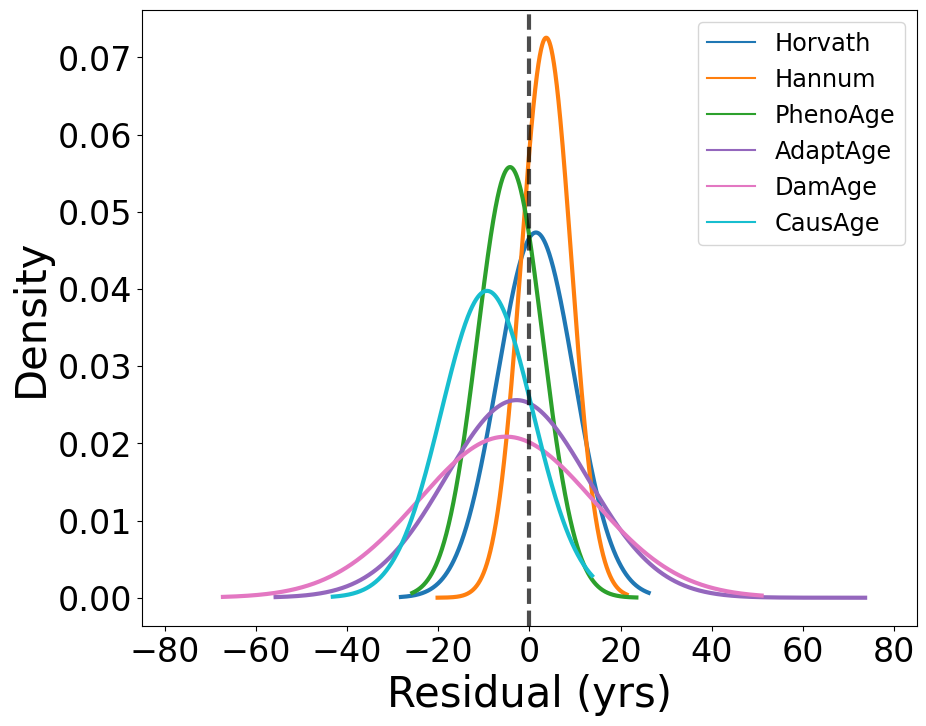

In [34]:
plt.figure(figsize=(10, 8)) 

sns.lineplot(h_model_errors, x='Error', y='Density', hue='Model', palette=custom, linewidth=3)
plt.axvline(x=0, color='black', linestyle='--', alpha=0.7, linewidth=3)

plt.xlim([-85,85])
plt.xlabel('Residual (yrs)',fontsize=30)
plt.ylabel('Density',fontsize=30)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(fontsize='xx-large', title_fontsize='50');

# Generate Figure 2b

In [35]:
# concatenate the residual distributions for each model into a single dataframe
d_model_errors = pd.concat([d_horvath_dist, d_hannum_dist, d_pheno_dist, d_adapt_dist, d_dam_dist, d_caus_dist], axis=0)

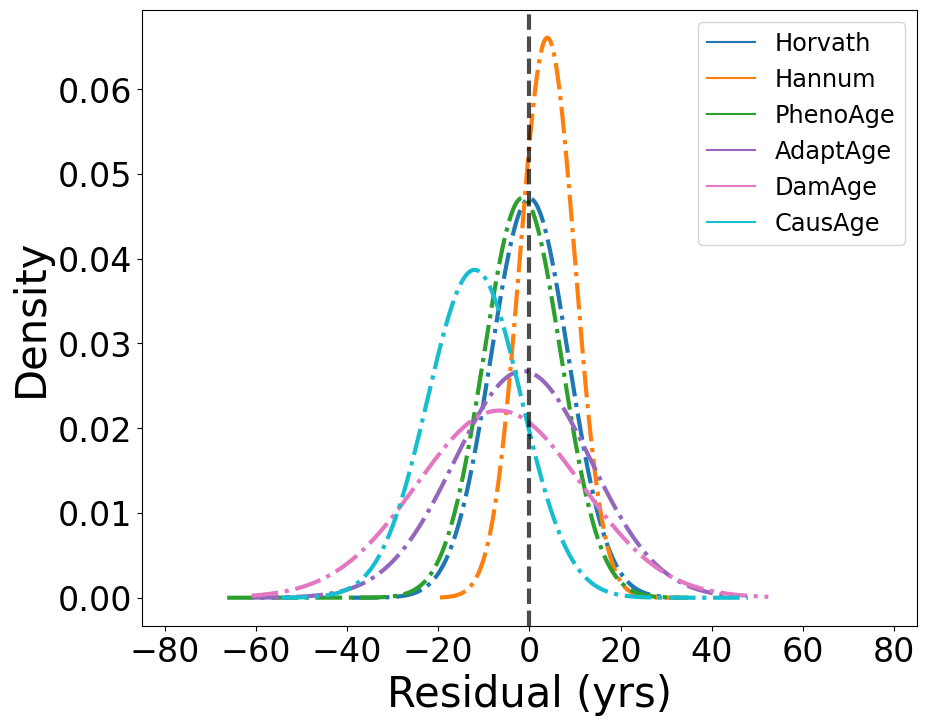

In [36]:
plt.figure(figsize=(10, 8)) 

sns.lineplot(d_model_errors, x='Error', y='Density', hue='Model', linestyle='-.', palette=custom, linewidth=3)
plt.axvline(x=0, color='black', linestyle='--', alpha=0.7, linewidth=3)

plt.xlim([-85,85])
plt.xlabel('Residual (yrs)',fontsize=30)
plt.ylabel('Density',fontsize=30)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(fontsize='xx-large', title_fontsize='50');

### Combine the model predictions and residuals into single dataframe

In [37]:
models = ['Horvath', 'Hannum', 'PhenoAge', 'AdaptAge', 'DamAge', 'CausAge']
comb_meta = pd.concat([h_meta,d_meta], axis=0)
hvd =  comb_meta[['age','disease']+models].copy()
# Melt the DataFrame
melted_df = pd.melt(hvd, id_vars=['age', 'disease'], var_name='Model', value_name='Prediction')
melted_df['Residual'] = melted_df.Prediction-melted_df.age

### Calculate the significances & effect size (Cohen's d) for each model's health v. disease cohort residuals comparison

In [41]:
significances = []
sig_key = {(0.05,1):'n.s.',
           (0.01,0.05):'*',
           (0.001,0.01):'**',
           (0, 0.001):'***'}

for model in melted_df.Model.unique():
    
    temp = melted_df[melted_df.Model==model]
    
    h_resids = temp[temp.disease==0].Residual
    d_resids = temp[temp.disease==1].Residual
    
    # Perform the Welch's t-test (independent t-test with unequal variances)
    statistic, p_value = ttest_ind(h_resids, d_resids, equal_var=False)
    d = cohens_d(h_resids,d_resids)
    
    for range_, sig_symbol in sig_key.items():
        if range_[0] <= p_value < range_[1]:
            sig = sig_symbol
    
    significances +=[[model, p_value, sig, d]]

# Generate Figure 2c

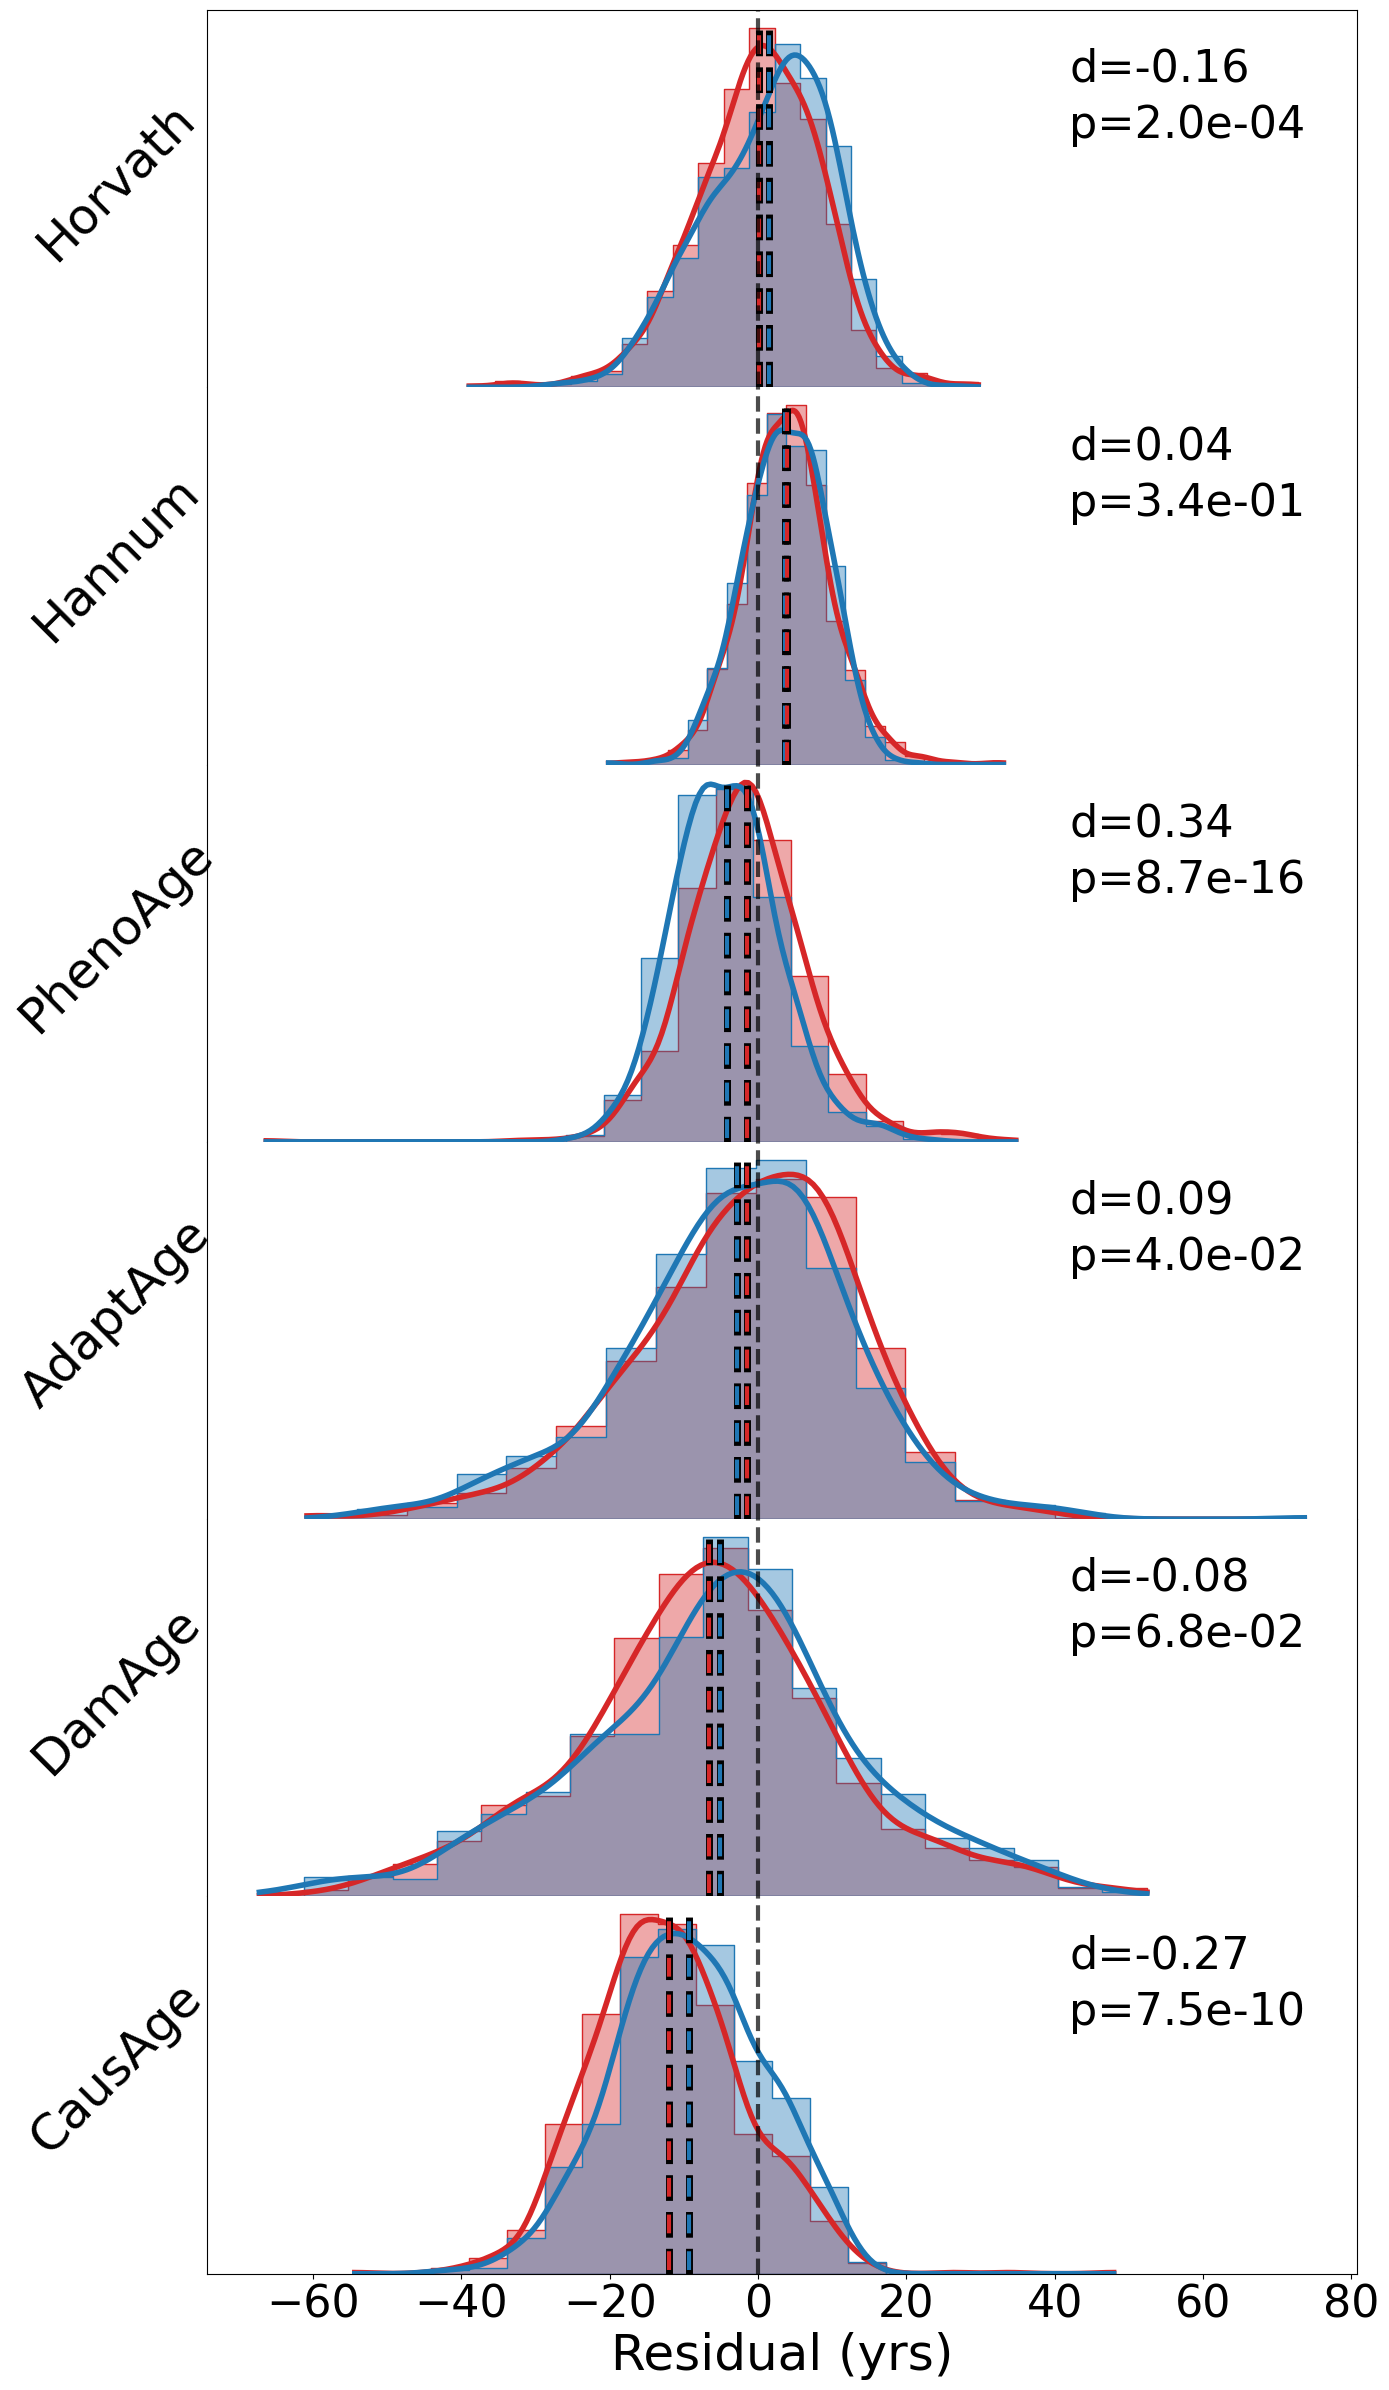

In [42]:
# Function to get significance and Cohen's d from the significances list for plotting
def get_significance_info(model, significances):
    for item in significances:
        if item[0] == model:
            p_value, significance, cohen_d = item[1], item[2], item[3]
            return p_value, significance, cohen_d
    return None, None, None

# Assuming melted_df is your DataFrame with columns 'Model', 'Residual', and 'disease'
# Define the models you want to compare
models = melted_df['Model'].unique()
disease_statuses = melted_df['disease'].unique()

# Create a single figure with multiple subplots arranged vertically
fig, axes = plt.subplots(nrows=len(models), ncols=1, figsize=(14, len(models) * 4), sharex=True, gridspec_kw={'hspace': 0})

# Define custom palette
blue = sns.color_palette()[0]
red = sns.color_palette()[3]
custom_palette = {disease_statuses[0]: blue, disease_statuses[1]: red}

for i, model in enumerate(models):
    ax = axes[i]  # Get the specific subplot
    model_data = melted_df[melted_df['Model'] == model]

    sns.histplot(
        data=model_data,
        x='Residual',
        hue='disease',
        palette=custom_palette,
        bins=20,
        kde=True,
        alpha=0.4,
        ax=ax,
        legend=False,
        element="step",
        stat="density",  # Normalize to percentage
        common_norm=False,  # Ensures separate normalization for each hue level
        line_kws={'linewidth': 4}
    )
    
    # Set model name as y-axis label
    ax.set_ylabel(f'{model}', fontsize=36, rotation=45, labelpad=50)
    ax.set_xlabel('Residual (yrs)', fontsize=36)

    # Remove density tick marks and density axis label
    ax.yaxis.set_ticks([])
    ax.set_yticklabels([])
    
    # Adjust the fontsize of the x-ticks for residuals
    ax.tick_params(axis='x', labelsize=32)

    # Plot means for each cohort (disease status)
    mean_disease = model_data[model_data['disease'] == disease_statuses[0]]['Residual'].mean()
    mean_undisease = model_data[model_data['disease'] == disease_statuses[1]]['Residual'].mean()
    ax.axvline(x=mean_disease, color=blue, linestyle='--', linewidth=3, label=f'Mean {disease_statuses[0]}',
               ymin=0.01, ymax=0.95, dashes=(4.5, 4.3), zorder=6)
    ax.axvline(x=mean_disease, color='k', linestyle='--', linewidth=5, ymax=0.95, label=f'Mean {disease_statuses[0]}')
    
    ax.axvline(x=mean_undisease, color=red, linestyle='--', linewidth=3, label=f'Mean {disease_statuses[1]}',
               ymin=0.01, ymax=0.95, dashes=(4.5, 4.3), zorder=6)
    ax.axvline(x=mean_undisease, color='k', linestyle='--', linewidth=5, ymax=0.95, label=f'Mean {disease_statuses[1]}')

    # Get precomputed p-value, significance, and Cohen's d
    p_value, significance, cohen_d = get_significance_info(model, significances)
    
    # Annotate Cohen's d on the plot using the Axes object
    if p_value is not None and significance is not None and cohen_d is not None:
        ax.text(0.75, 0.9, f"d={cohen_d:.2f}", transform=ax.transAxes, fontsize=32, verticalalignment='top')
        ax.text(0.75, 0.75, f"p={p_value:.1e}", transform=ax.transAxes, fontsize=32, verticalalignment='top')

    # Remove top and bottom borders for all but the first and last plot
    if i != 0:
        ax.spines['top'].set_visible(False)
    if i != len(models) - 1:
        ax.spines['bottom'].set_visible(False)

plt.tight_layout()

# Add a dashed vertical line at x=0 on all subplots
for ax in axes:
    ax.axvline(x=0, color='black', linestyle='--', alpha=0.7, linewidth=3, zorder=10)

## Load DunedinPACE model and analyze PACE scores for `V7 combined` dataset

In [43]:
pace = pd.read_excel('../dnam-clocks/mFSS-clock/data/processed/models/Pace/Pace.xlsx')
pace=prep_model(pace)

h_pace = pd.read_pickle('../dnam-clocks/mFSS-clock/data/processed/models/pace/Healthy.pkl')
d_pace = pd.read_pickle('../dnam-clocks/mFSS-clock/data/processed/models/pace/Disease.pkl')

In [44]:
h_meta.loc[:, 'PACE'] = get_preds(h_pace, pace)
d_meta.loc[:, 'PACE'] = get_preds(d_pace, pace)

In [45]:
#combine the patient and healthy control predictions
comb_meta = pd.concat([h_meta,d_meta], axis=0)

# Replace values for plot hue and legend
comb_meta['disease'] = comb_meta['disease'].replace({0: 'Control', 1: 'Inflammaging'})

# Generate Figure 2d

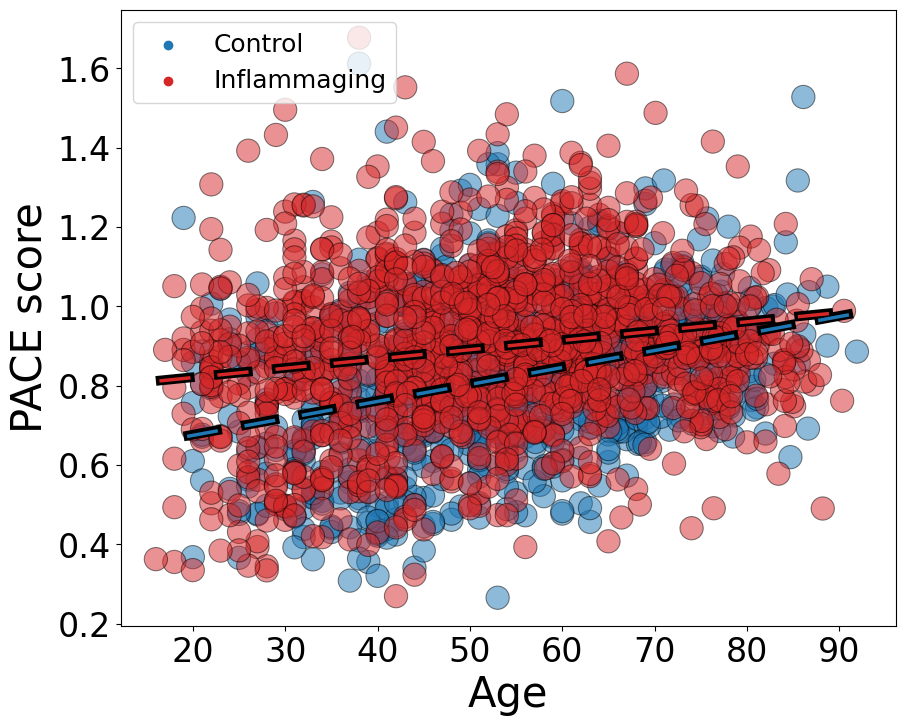

In [46]:
#regress PACE score on age
regression = stats.linregress(h_meta.age.astype(float), h_meta.PACE.astype(float))
slope, intercept, rvalue, pvalue, stderr = regression
h_preds = slope*h_meta.age+intercept

blue = sns.color_palette()[0]
red=sns.color_palette()[3]

#set conditions for custom color palette
conditions = ['Control', 'Inflammaging']

custom= {conditions[0]:blue, conditions[1]:red}

plt.figure(figsize=(10, 8)) 
# Create a scatter plot of the transformed data
sns.scatterplot(data=comb_meta, x='age', y='PACE',hue='disease', s=280, palette = custom, alpha = 0.5, 
                edgecolor='k', linewidth=0.75)

sns.regplot(data = comb_meta[comb_meta.disease=='Control'], x=comb_meta[comb_meta.disease=='Control'].age+0.38, y='PACE', scatter=False,ci=0, color=blue, 
            line_kws={"linestyle": "--","linewidth":2.5, "dashes":(9, 7.8), "zorder":6})
sns.regplot(data = comb_meta[comb_meta.disease=='Control'], x='age', y='PACE', scatter=False,ci=0, color='k',
            line_kws={"linestyle": "--","linewidth":7, "dashes":(4, 2), "zorder":5})

sns.regplot(data = comb_meta[comb_meta.disease!='Control'], x=comb_meta[comb_meta.disease!='Control'].age+0.38, y='PACE', scatter=False,ci=0, color=red, 
            line_kws={"linestyle": "--","linewidth":2.5, "dashes":(9, 7.8), "zorder":6})
sns.regplot(data = comb_meta[comb_meta.disease!='Control'], x='age', y='PACE', scatter=False,ci=0, color='k',
            line_kws={"linestyle": "--","linewidth":7, "dashes":(4, 2), "zorder":5})


plt.xlabel('Age',fontsize=30)
plt.ylabel('PACE score',fontsize=30)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(loc='upper left', fontsize=18);

# Generate Figure 2e

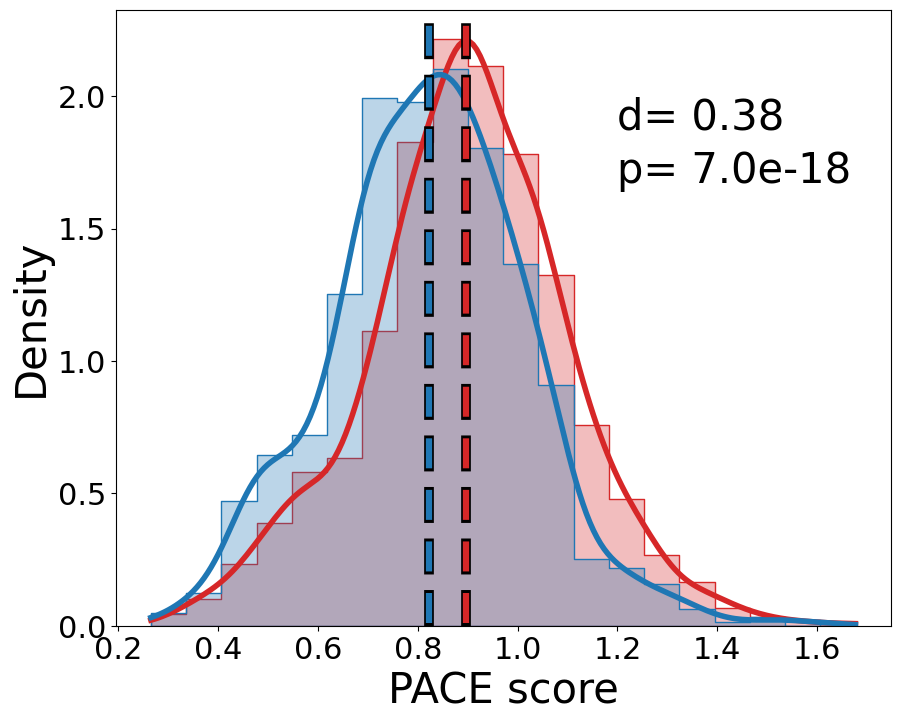

In [26]:
plt.figure(figsize=(10, 8))

h_scores = comb_meta[comb_meta.disease=='Control'].PACE
d_scores = comb_meta[comb_meta.disease=='Inflammaging'].PACE

# Perform Welsch's t-test with unequal variance between patient and hc corhort PACE score distributions
statistic, p_value = stats.ttest_ind(d_scores, h_scores, equal_var=False)

d = cohens_d(h_scores, d_scores)
plt.text(1.2, 2, f"d= {d:.2f}", fontsize=30, verticalalignment='top')
plt.text(1.2, 1.8, f"p= {p_value:.1e}", fontsize=30, verticalalignment='top')

    
# Define the desired order of categories
sns.histplot(data=comb_meta, x='PACE', kde=True, 
             bins=20, alpha=0.3, hue='disease',
             element="step",
             stat="density",  # Normalize to percentage
             common_norm=False,  # Ensures separate normalization for each hue level
             legend=False, 
             palette=custom, 
             line_kws={'linewidth': 4})

plt.xlabel('PACE score',fontsize=30)
plt.ylabel('Density',fontsize=30)


# Add vertical lines for means
plt.axvline(x=d_scores.mean(), color=red, linestyle='--',ymin=0.005, dashes=(4.8, 3.45),linewidth=4.5,zorder=6)
plt.axvline(x=d_scores.mean(), color='k', linestyle='--',linewidth=7)
plt.axvline(x=h_scores.mean(), color=blue, linestyle='--',ymin=0.005, dashes=(4.8, 3.45),linewidth=4.5,zorder=6)
plt.axvline(x=h_scores.mean(), color='k', linestyle='--',linewidth=7)


plt.xticks(fontsize=22);
plt.yticks(fontsize=22);

## Gather the 95-IPRs and means for the model predictions on the healthy and patient cohorts to generate Table 1

In [27]:
# Combine the model stats for the healhty cohort
h_model_stats = [h_adapt_stats,h_dam_stats,h_caus_stats,h_hannum_stats,h_horvath_stats,h_pheno_stats]

# Combine the low and the high cutoffs for the 95-IPR
model_stats=[]
for model in h_model_stats:
    model_stats+=[(model[0][0], model[0][1].astype(str)+'-'+model[0][2].astype(str),round(model[0][3],1))]

In [28]:
# Put stats into dataframe
model_stats = pd.DataFrame(model_stats, columns = ['Model','HC: 95-IPR (yrs)','HC: mean (yrs)'])

In [29]:
# Combine the model stats for the patient cohort
d_model_stats = d_adapt_stats+d_dam_stats+d_caus_stats+d_hannum_stats+d_horvath_stats+d_pheno_stats

# Put stats into dataframe
d_model_stats = pd.DataFrame(d_model_stats, columns = ['Model','low','high','IC mean'])

# Generate Table 1

In [30]:
#Calculate the mean shift for the patient cohort relative to the healthy control cohort 
model_stats['IC: mean shift (yrs)'] = d_model_stats['IC mean']-model_stats['HC: mean (yrs)']
model_stats

,Model,HC: 95-IPR (yrs),HC: mean (yrs),IC: mean shift (yrs)
0,AdaptAge,-33.4-27.7,-2.8,1.3
1,DamAge,-42.6-32.3,-5.2,-1.4
2,CausAge,-29.0-10.4,-9.3,-2.7
3,Hannum,-7.1-14.5,3.7,0.2
4,Horvath,-15.1-18.0,1.4,-1.3
5,PhenoAge,-18.3-9.8,-4.3,2.8


# Generate Supplementary Figure 2a

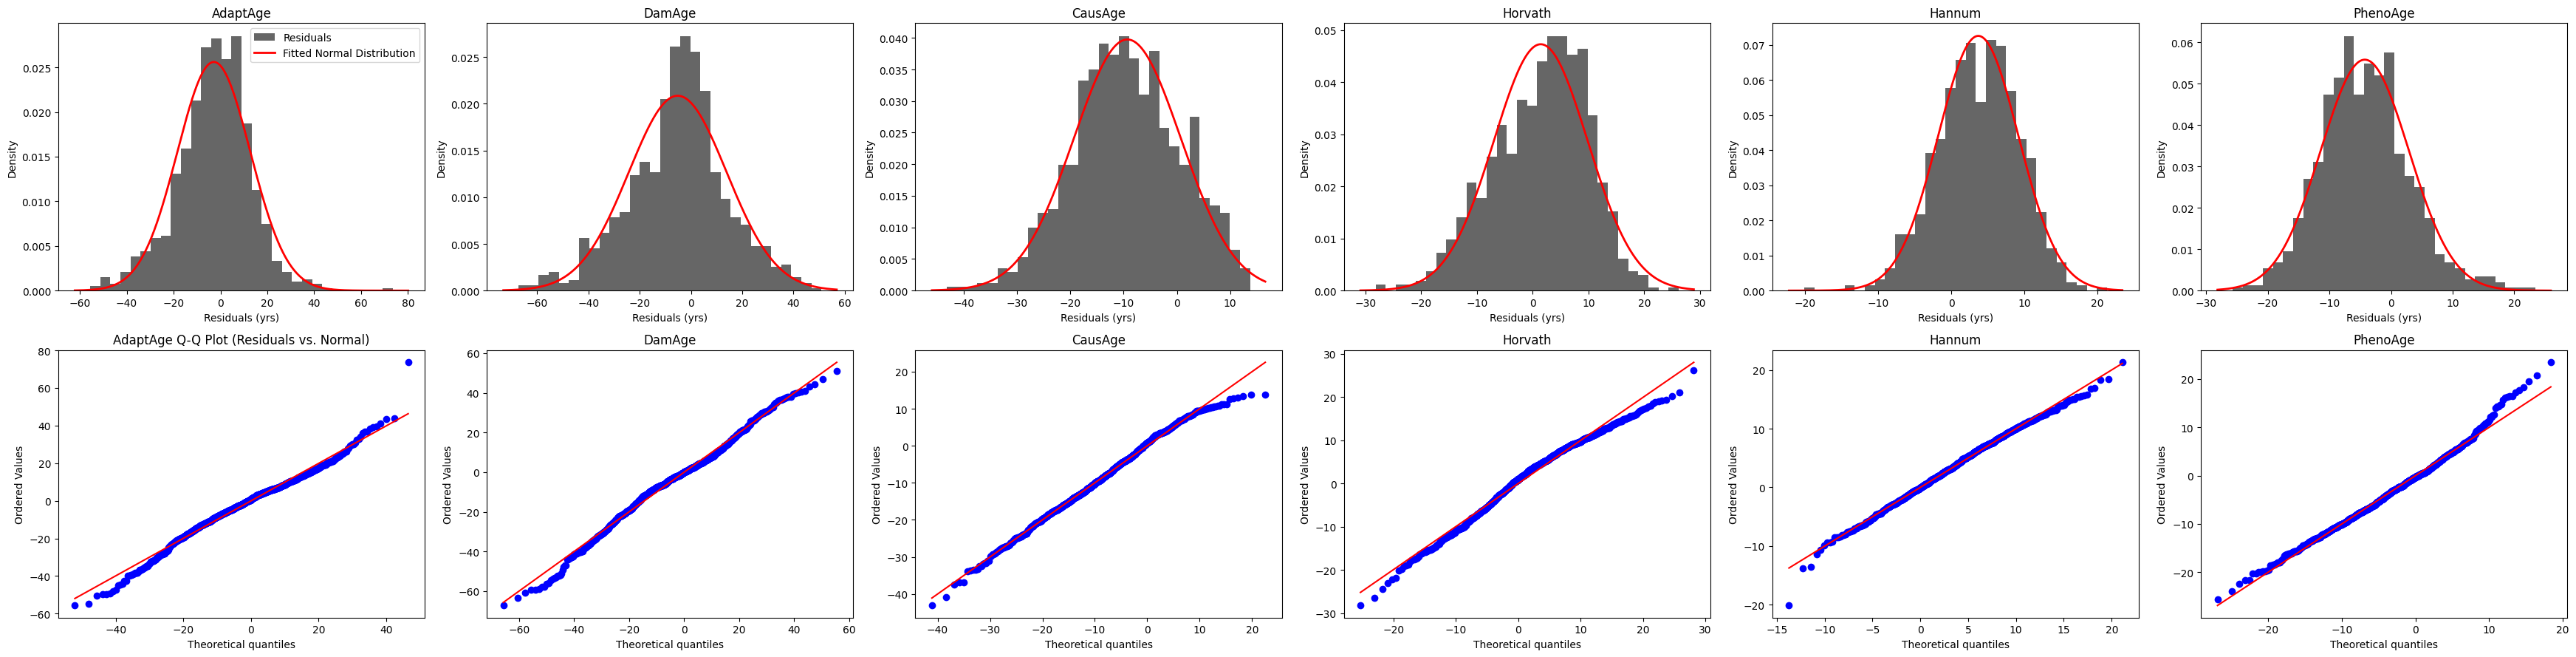

In [31]:
# Set the model order
models = ['AdaptAge', 'DamAge', 'CausAge','Horvath', 'Hannum', 'PhenoAge']

# Get number of models for subplots
n_models = len(models)

# Create the figure and set the subplots layout (2 rows and n_models columns)
fig, axes = plt.subplots(2, n_models, figsize=(35, 9))

# Loop through models for Histograms (first row) and Q-Q plots (second row)
for i, model in enumerate(models):
    # Calculate residuals for the current model
    resids = h_meta[model] - h_meta.age

    # Histogram (first row)
    axes[0, i].hist(resids, bins=30, density=True, alpha=0.6, color='k', label='Residuals')
    
    # Fit Normal distribution to residuals and plot
    params_norm = stats.norm.fit(resids)
    # Get the residual range for the model
    xmin, xmax = axes[0, i].get_xlim()
    # Generate x-values (residuals) over which to plot
    model_x = np.linspace(xmin, xmax, 1000)
    # Generate the densities for the normal fit to the residual distribution
    resid_densities = stats.norm.pdf(model_x, *params_norm)
    
    # Plot the fitted normal distribution
    axes[0, i].plot(model_x, resid_densities, 'r-', linewidth=2, label='Fitted Normal Distribution')
    
    # Set labels and titles for the histogram
    axes[0, i].set_title(f'{model}')
    axes[0, i].set_xlabel('Residuals (yrs)')
    axes[0, i].set_ylabel('Density')

    # Only add legend to the first histogram plot
    if i == 0:
        axes[0, i].legend()

    # Q-Q Plot (second row)
    stats.probplot(resids, dist="norm", sparams=params_norm, plot=axes[1, i])
        
    # Set custom title for the first Q-Q plot
    if i == 0:
        axes[1, i].set_title(f'{model} Q-Q Plot (Residuals vs. Normal)')
    else:
        axes[1, i].set_title(f'{model}')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

## Prepare the data for Supplementary Figure 2b

In [32]:
# Set the model order for the figure
models = ['Horvath', 'Hannum', 'PhenoAge', 'AdaptAge', 'DamAge', 'CausAge']

In [33]:
# Define the age bins
cutoffs = [20,30,40,50,60,70,80]
cutoff_dict = {20: '20-29', 
            30: '30-39',
            40: '40-49',
            50: '50-59',
            60: '60-69',
            70: '70-79',
            80: '80-89'}

In [34]:
fit_df = pd.DataFrame(columns=['Error', 'Density', 'Cutoff', 'Model'])
stats_df = pd.DataFrame(columns=['Model','Cutoff', 'Mean', 'Stdev'])

for cutoff in cutoffs:

    temp = h_meta[(h_meta.age>=cutoff) & (h_meta.age<(cutoff+10))]
       

    for model in models:

        resids = list(temp[model]-temp.age)
        
        # Fit Normal distribution parameters
        params_norm = stats.norm.fit(resids)
        mu, std = params_norm

        # Create PDFs (probability density functions) of the fitted distributions
        xmin = min(resids)-10
        xmax = max(resids)+10
        model_x = np.linspace(xmin, xmax, 1000)
        model_densities = stats.norm.pdf(model_x, mu, std)

        fit_df = pd.concat([fit_df,pd.DataFrame({'Error': model_x, 'Density': model_densities, 'Cutoff': cutoff_dict[cutoff], 'Model': model})],axis=0)
        stats_df = pd.concat([stats_df,pd.DataFrame({'Model': model, 'Cutoff': cutoff_dict[cutoff], 'Mean': [mu], 'Stdev': [std]})],axis=0)
                            

# Generate Supplementary Figure 2b

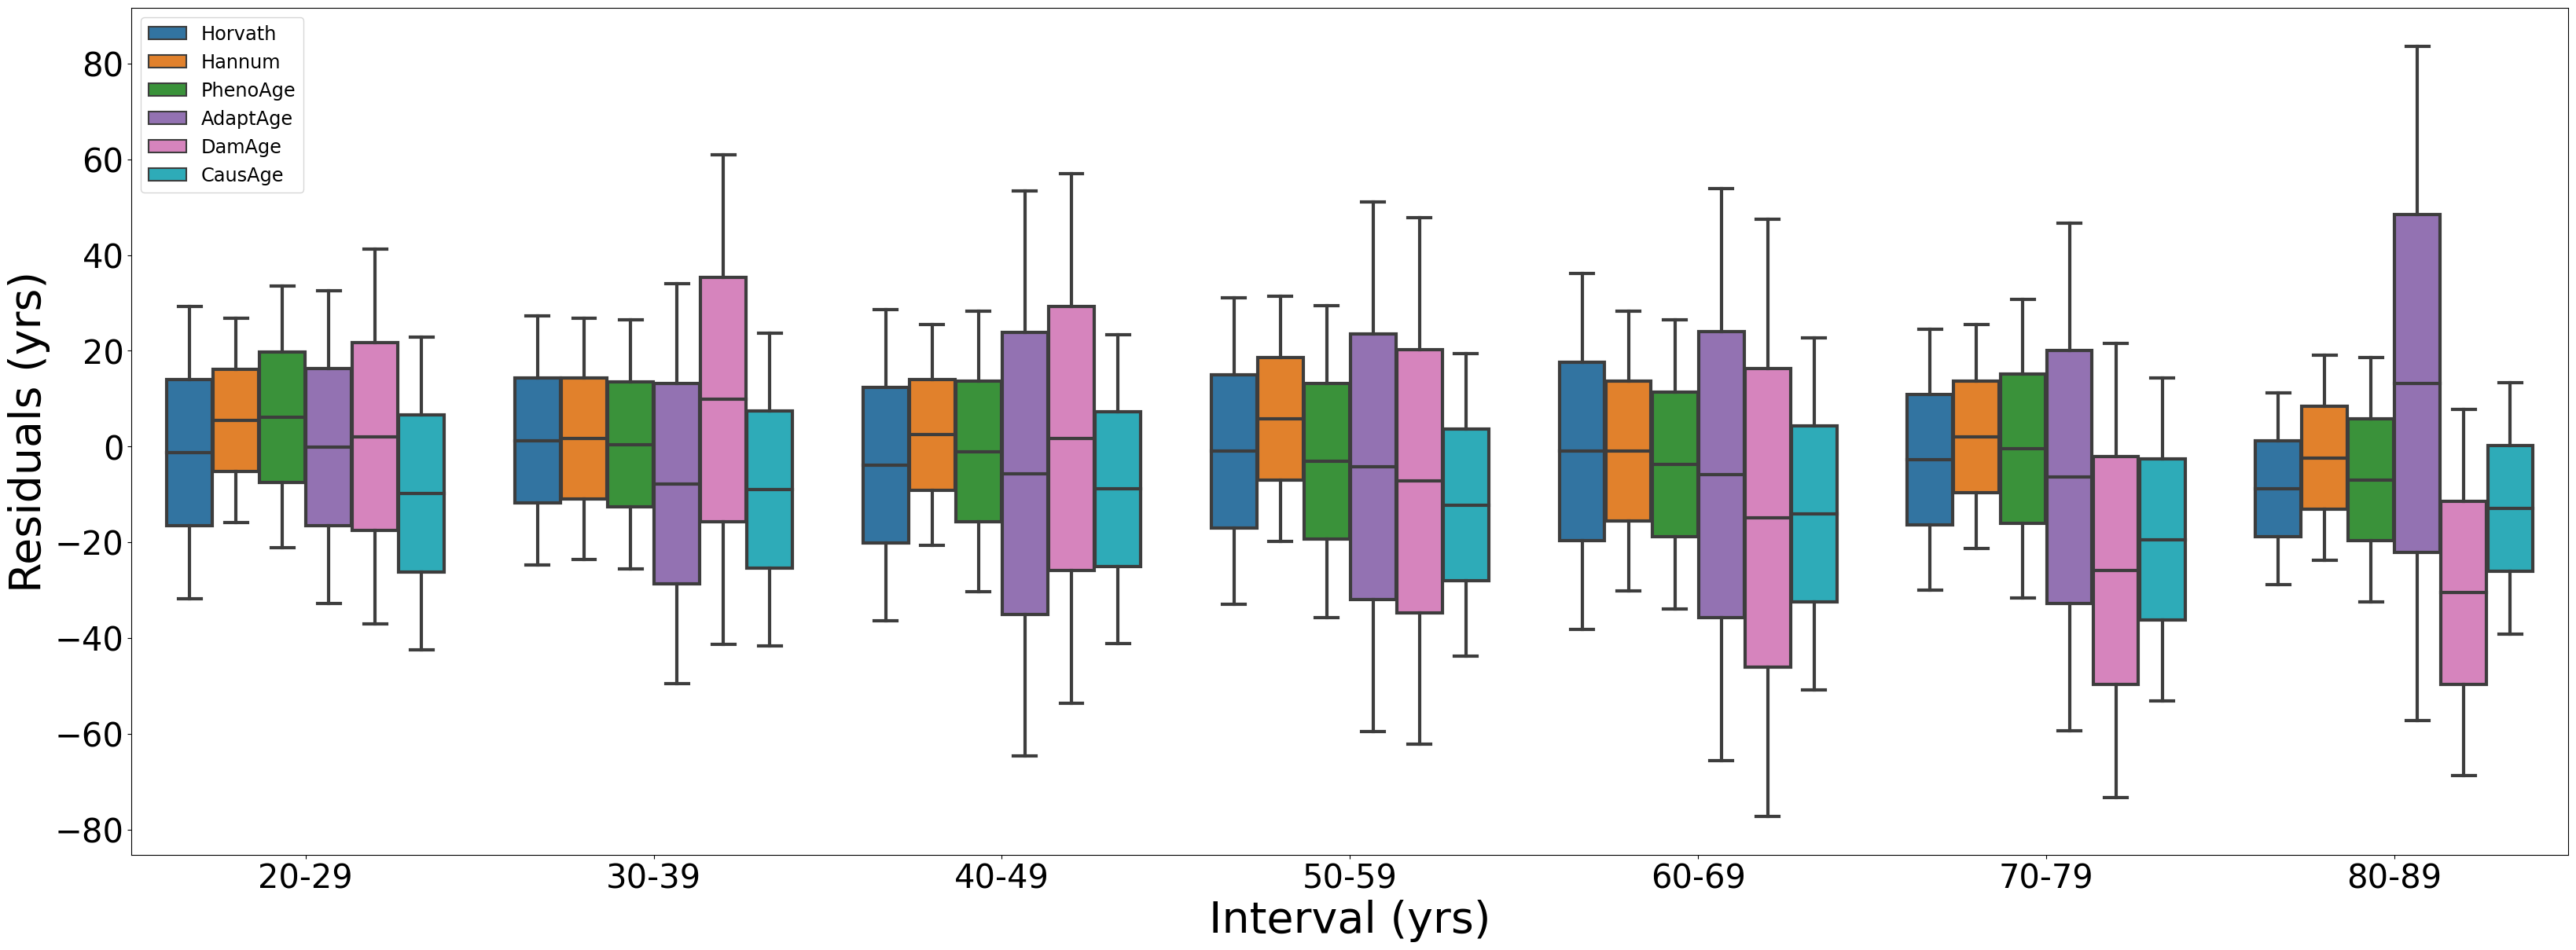

In [35]:
c_palette = sns.color_palette()
custom = c_palette[:3] + [c_palette[4]]+[c_palette[6]]+ c_palette[9:]

plt.figure(figsize=(40, 14)) 

sns.boxplot(fit_df, x='Cutoff', y='Error', hue='Model', palette=custom, linewidth=3)

plt.xlabel('Interval (yrs)',fontsize=40)
plt.ylabel('Residuals (yrs)',fontsize=40)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend(fontsize='xx-large', title_fontsize='200');

# Figure X

In [3]:
%run scripts/utils/data_processing.py
%run scripts/coherence_analysis_and_transform.py

In [1]:
def gen_plot(alpha, l1, dataset, df):    
    elastic_netCV = ElasticNetCV(l1_ratio = l1, alphas=alpha, cv = 10, n_jobs=-1, random_state = 10,
                                     max_iter=6000, tol = 0.001, selection='cyclic')

    model = elastic_netCV.fit(X_train,y_train)

    shift = df.copy()
    shift['EN weight'] = abs(model.coef_)

    plt.figure(figsize=(8, 7))
    # alpha = 0.5
    sns.scatterplot(data=shift, x='Abs. d', y='EN weight', hue='Abs. correlation', s=150)
    plt.title(f'{dataset}: alpha={alpha[0]}, L1 ratio = {l1}',fontsize=22)
    plt.xlabel('Absolute Cohen\'s d', fontsize=24)
    plt.ylabel('Weight',fontsize=24)
    plt.xticks(fontsize=20);
    plt.yticks(fontsize=20);

# Load the GSE42861 (rheumatoid arthritis) dataset and top 10k age correlated CpGs (w.r.t. GSE40279)

In [ ]:
data_path = '../dnam-clocks/mFSS-clock/data/processed/'